Latar Belakang:
menggunakan data ramen-ratings untuk melakukan clusterisasi data ramen dengan required variety dan style, denngan mengolah data tersebut maka dapat diketahuui tiap tiap cluster dari ramen yang ada.
Metode:
1. Melakukan proses mengubah data text menjadi numerik
2. Metode menggunakan kmeans 
3. Metode menggunakan libary NLTK TFIDf skelarn


1. Melalukan data understanding data preparation

In [ ]:
# import libraries pandas untuk melakukan pembacaan file
import pandas as pd

In [ ]:
# membaca file menggunakan pandas menggunakan fungsi read_csv

df = pd.read_csv('ramen-ratings.csv')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [ ]:
# untuk mengetahui tipe data di atribut

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


2. Melakukan Data cleaning mencari missing value

Text(0.5, 1.0, 'Rasio nilai yang hilang per columns')

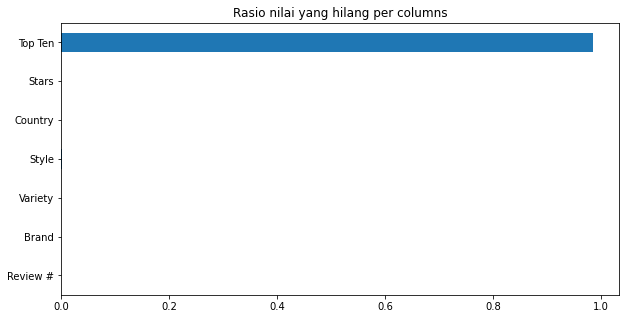

In [ ]:
# mengimport librari matplotlib 
# melihat data nulll pada program 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Rasio nilai yang hilang per columns")

3. melakukan visualisasai data menggunakan histogram dilihat berdasarkan style dan berdasarkan negara serta menghitung jumlahnya



In [ ]:
# visualisasi data menggunakan grafik bar

import plotly.express as px

custom_aggregation = {}
custom_aggregation["Style"] = "count"
data2 = df.groupby("Style").agg(custom_aggregation)

data2.columns = ["Count"]
data2['Style'] = data2.index

fig = px.bar(data2, x='Style', y="Count", color="Style", title="Jumlah Wadah Ramen Yang digunakan")
fig.show()

In [ ]:
# visualisasi data menggunakan grafik bar berdasarkan Country

custom_aggregation = {}
custom_aggregation["Variety"] = "count"
data2 = df.groupby("Country").agg(custom_aggregation)

data2.columns = ["Count"]
data2['Country'] = data2.index

fig = px.bar(data2, x='Country', y="Count", color="Country", title="Variasi Ramen di beberapa negara")
fig.show()

4. Data Preprosessing

In [ ]:
# menggunakan nltk (natural language processing) untuk melakukan text mining menggunakan ekstraksi fitur tfid 

import nltk
# nltk.download()

In [ ]:


import warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


X = df["Variety"].unique()
stemmer = nltk.stem.porter.PorterStemmer()
# stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (2413, 1373) of float64


5. Data Transformasi

In [ ]:
# Melakukan Nomalisasi data 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)
TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (2413, 100) of float64


Melalukan proses Clusterisasi menggunakan Kmeans

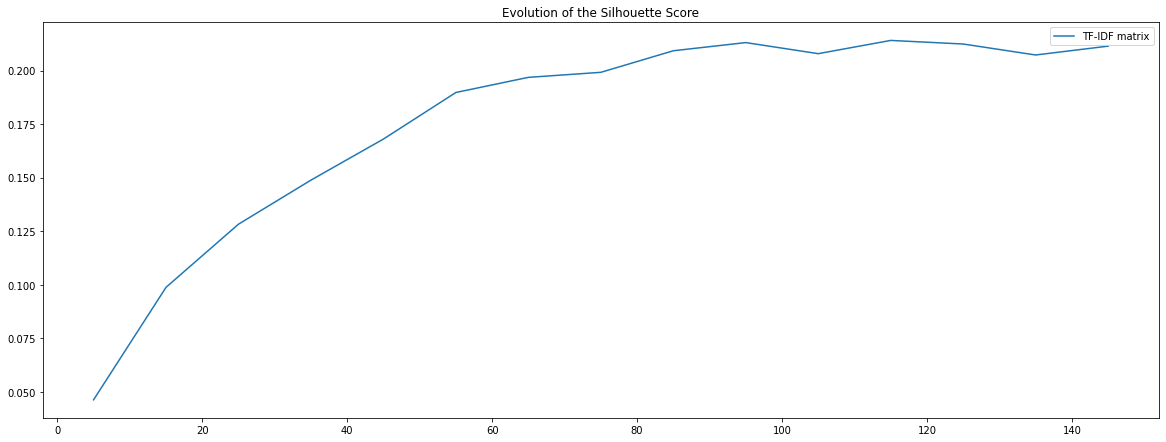

In [ ]:
# Silhoutte Scoring unutk menentukan jumlah nilai cluster yang tepat 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

score_tfidf = []
x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)
    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)
    
plt.figure(figsize=(20,16))
plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

Text(0.5, 1.0, 'ACP with 80 clusters')

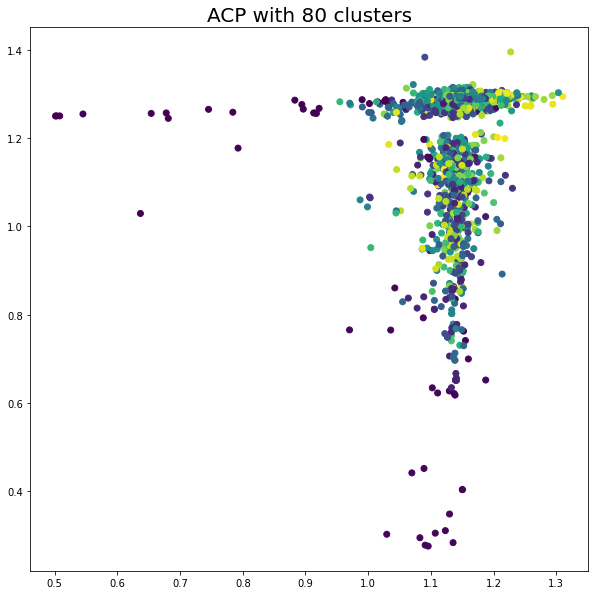

In [ ]:
# membuat clustering dengan KMeans sesuai dengan nilai Silhoutte dengan cluster 80

n_clusters = 80
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 80 clusters", fontsize="20")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[77 15 35 ...  2 72 68]


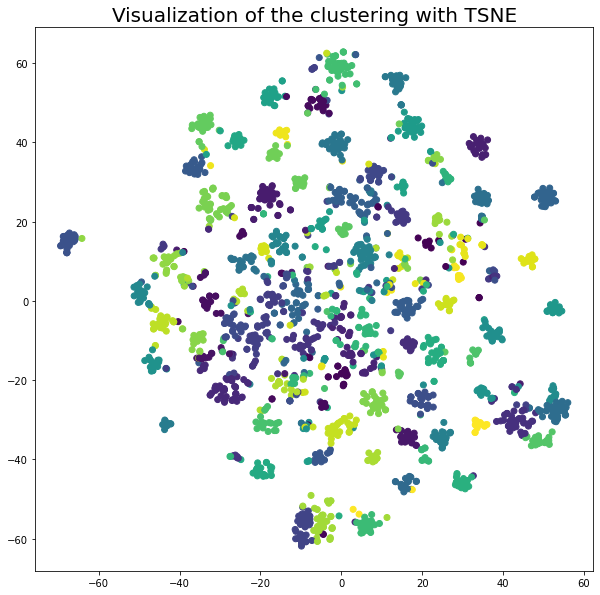

In [ ]:
# Clustering  data menggunakan TSNE  dan visualisasi menggunakan matplotlib scatter
# https://scikit-learn.org/stable/modules/manifold.html

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")
print(clusters)

In [ ]:
import plotly as py
import plotly.graph_objs as go


In [ ]:
pd.DataFrame(proj)

,0,1
0,-13.323604,39.518612
1,-3.540096,25.144018
2,8.576500,13.355300
3,33.835548,28.201092
4,8.985497,-38.270061
...,...,...
2408,20.304495,2.458941
2409,17.661892,-2.178431
2410,-3.902992,-26.708708
2411,-1.682031,-32.301270


In [ ]:
data_labels = pd.read_csv('ramen-ratings.csv')
data_labels.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [ ]:
# menampilkan secara 3 dimensi darinilai yang telah di proses

trace = go.Scatter3d(
                    x = proj[:,0] ,
                    y = proj[:,1],
                    z = data_labels['Stars'],
                    mode = 'markers',
                    marker=dict(color=proj[:,0], size = 5, line=dict(color=proj[:,1], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clustersasi Ramen-ratings Data',
                    scene= dict(
                                xaxis = dict(title = 'Style'),
                                yaxis = dict(title = 'Variety'),
                                zaxis = dict(title = 'Stars'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()